<a href="https://colab.research.google.com/github/Ell-neto/Modelos_Deteccao_Fraude/blob/main/Detec%C3%A7%C3%A3o_de_fraudes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos preditivos

## Análise com Pandas

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fraud_dataset_example.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

## Trazendo as colunas de fraude para o começo do dataset

In [ ]:
df = df[['isFraud',
       'isFlaggedFraud','step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]
df.head()

,isFraud,isFlaggedFraud,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


## Renomeando colunas

In [ ]:
colunas = {'isFraud':'fraude', 
           'isFlaggedFraud':'super_fraude',
           'step':'tempo', 
           'type':'tipo', 
           'amount':'valor', 
           'nameOrig':'cliente_origem', 
           'oldbalanceOrg':'saldo_inicial_ori', 
           'newbalanceOrig':'novo_saldo_ori',
           'nameDest':'cliente_destino', 
           'oldbalanceDest':'saldo_inicial_dest', 
           'newbalanceDest':'novo_saldo_dest'}

In [ ]:
df = df.rename(columns = colunas)
df.head()

,fraude,super_fraude,tempo,tipo,valor,cliente_origem,saldo_inicial_ori,novo_saldo_ori,cliente_destino,saldo_inicial_dest,novo_saldo_dest
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


In [ ]:
df.describe()

,fraude,super_fraude,tempo,valor,saldo_inicial_ori,novo_saldo_ori,saldo_inicial_dest,novo_saldo_dest
count,101613.000000,101613.0,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05
mean,0.001142,0.0,8.523457,1.740901e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06
std,0.033768,0.0,1.820681,3.450199e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06
min,0.000000,0.0,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.0,8.000000,1.001659e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,0.0,9.000000,5.338541e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04
75%,0.000000,0.0,10.000000,2.124984e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06
max,1.000000,0.0,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fraude,101613.0,1.141586e-03,3.376824e-02,0.00,0.00,0.00,0.00,1.00
super_fraude,101613.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
tempo,101613.0,8.523457e+00,1.820681e+00,1.00,8.00,9.00,10.00,10.00
valor,101613.0,1.740901e+05,3.450199e+05,0.32,10016.59,53385.41,212498.40,10000000.00
saldo_inicial_ori,101613.0,9.071753e+05,2.829575e+06,0.00,0.00,20190.47,194715.00,38939424.03
novo_saldo_ori,101613.0,9.234992e+05,2.867319e+06,0.00,0.00,0.00,219217.76,38946233.02
saldo_inicial_dest,101613.0,8.810428e+05,2.399949e+06,0.00,0.00,21058.00,591921.70,34008736.98
novo_saldo_dest,101613.0,1.183998e+06,2.797761e+06,0.00,0.00,51783.43,1063121.64,38946233.02


In [ ]:
df.shape

(101613, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fraude              101613 non-null  int64  
 1   super_fraude        101613 non-null  int64  
 2   tempo               101613 non-null  int64  
 3   tipo                101613 non-null  object 
 4   valor               101613 non-null  float64
 5   cliente_origem      101613 non-null  object 
 6   saldo_inicial_ori   101613 non-null  float64
 7   novo_saldo_ori      101613 non-null  float64
 8   cliente_destino     101613 non-null  object 
 9   saldo_inicial_dest  101613 non-null  float64
 10  novo_saldo_dest     101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


## Verificando a variavel target

In [ ]:
df.groupby("fraude").tempo.count()

fraude
0    101497
1       116
Name: tempo, dtype: int64

In [ ]:
df.isnull().values.any()

False

## Enconding

In [ ]:
# !pip install pandas-profiling
# !pip install --upgrade pandas-profiling

In [ ]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df)
# profile

In [ ]:
df = pd.get_dummies(data=df, columns=['tipo'])
df.head()

,fraude,super_fraude,tempo,valor,cliente_origem,saldo_inicial_ori,novo_saldo_ori,cliente_destino,saldo_inicial_dest,novo_saldo_dest,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1,0
1,0,0,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1,0
2,1,0,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,0,0,0,1
3,1,0,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,1,0,0,0
4,0,0,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1,0


In [ ]:
df = df.drop(['cliente_origem','cliente_destino','super_fraude'], axis=1)

In [ ]:
df.head()

,fraude,tempo,valor,saldo_inicial_ori,novo_saldo_ori,saldo_inicial_dest,novo_saldo_dest,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,0,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,0,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


## Regressão Logística

In [ ]:
x = df.drop('fraude', axis=1)
y = df['fraude']

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)



*   **Acurácia/Accuracy**: avalia a proporção de acertos em relação a todas as previsões realizadas.
*   **Sensibilidade/Revocação/Recall**: avalia a proporção de verdadeiros positivos dentre todos os valores positivos reais.
*  **Precisão/Precision**: avalia a proporção de verdadeiros positivos dentre as predições dadas como positivas pelo modelo. 
* **F1 Score**: é o equilíbrio entre a sensibilidade e a precisão, sendo a média harmônica entre as duas métricas.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Acurácia: ", metrics.accuracy_score(y_test, y_pred))
print("Precisão: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1: ", metrics.f1_score(y_test, y_pred))

Acurácia:  0.9989765391276965
Precisão:  0.2
Recall:  0.043478260869565216
F1:  0.07142857142857142


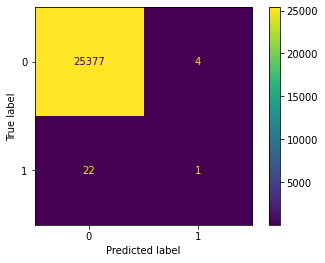

In [ ]:
from ast import increment_lineno
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

*A curva ROC é uma das ferramentas utilizadas para avaliar um classificador mostrando a relação entre a taxa dos verdadeiros positivos e a taxa dos falsos positivos para vários pontos de cortes diferentes.
A taxa dos verdadeiros positivos representa a taxa de amostras positivas que são corretamente classificadas.*



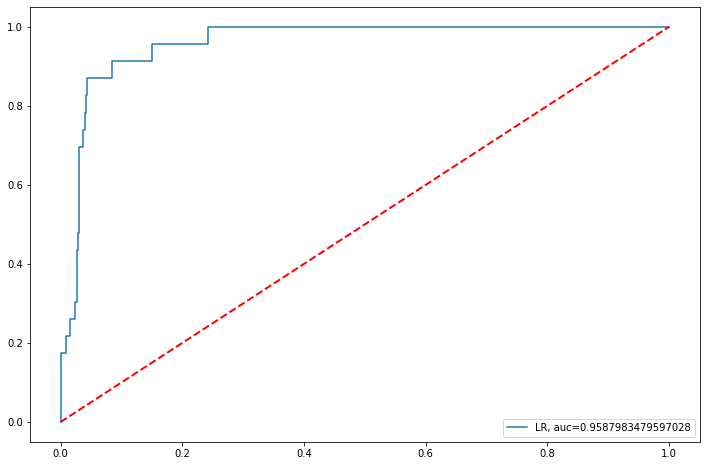

In [ ]:
# Curva ROC

y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label="LR, auc="+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)
plt.show()

## Balanceamento de dados

*Para evitar que existam muitos dados idênticos (por decorrência do Oversampling), pode ser utilizada a técnica SMOTE, que consiste em sintetizar novas informações com base nas já existentes. Esses dados “sintéticos” são relativamente próximos aos dados reais, mas não são idênticos.*

In [ ]:
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np

smote = SMOTE(random_state=SEED)


In [ ]:
x = df.drop('fraude', axis=1)
y = df['fraude']

In [ ]:
x_resampled, y_resampled = smote.fit_resample(x,y)

In [ ]:
df_balanced = pd.concat([y_resampled, x_resampled], axis=1)
df_balanced

,fraude,tempo,valor,saldo_inicial_ori,novo_saldo_ori,saldo_inicial_dest,novo_saldo_dest,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.640000,170136.000000,160296.36,0.000000,0.000000,0,0,0,1,0
1,0,1,1864.280000,21249.000000,19384.72,0.000000,0.000000,0,0,0,1,0
2,1,1,181.000000,181.000000,0.00,0.000000,0.000000,0,0,0,0,1
3,1,1,181.000000,181.000000,0.00,21182.000000,0.000000,0,1,0,0,0
4,0,1,11668.140000,41554.000000,29885.86,0.000000,0.000000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
202989,1,5,17608.962863,17608.962863,0.00,0.000000,0.000000,0,0,0,0,1
202990,1,7,12116.291013,12116.291013,0.00,0.000000,0.000000,0,0,0,0,1
202991,1,1,231612.880715,231612.880715,0.00,1945.589357,9370.603471,0,0,0,0,0
202992,1,9,547325.144758,547325.144758,0.00,0.000000,0.000000,0,0,0,0,1


In [ ]:
df_balanced.groupby('fraude').tempo.count()

fraude
0    101497
1    101497
Name: tempo, dtype: int64

#### Novo teste do LR

In [ ]:
x = df_balanced.iloc[:, 1:].values
y = df_balanced.iloc[:, 0].values

In [ ]:

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)

In [ ]:
lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Acurácia: ", metrics.accuracy_score(y_test, y_pred))
print("Precisão: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1: ", metrics.f1_score(y_test, y_pred))

Acurácia:  0.9417722516699837
Precisão:  0.9241993556945234
Recall:  0.9623125493291239
F1:  0.9428709521507975


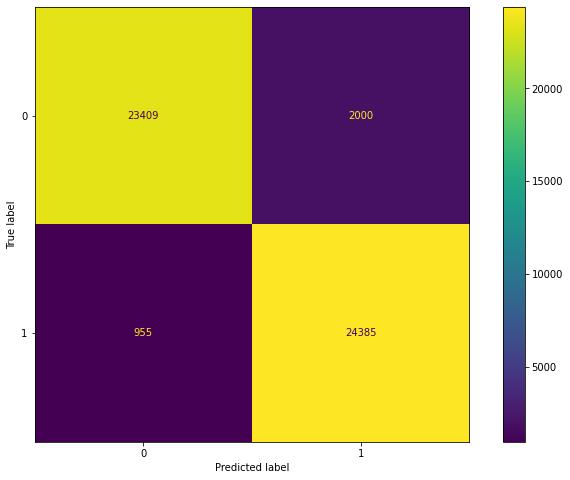

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

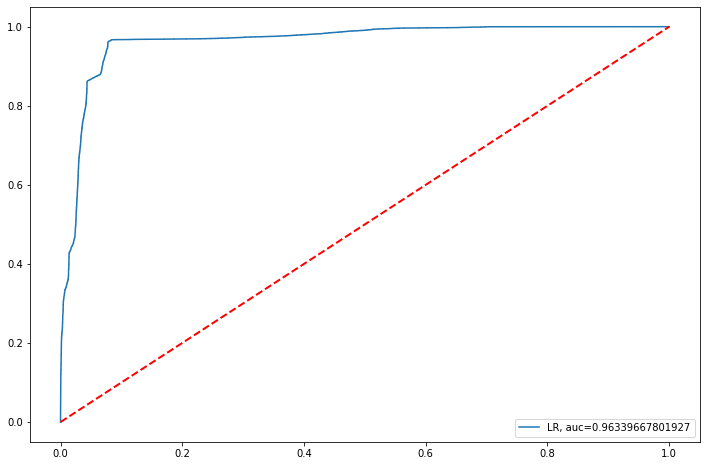

In [ ]:
# Nova Curva ROC

y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label="LR, auc="+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)
plt.show()

## Árvore de Decisão

*Essas árvores podem ser utilizadas tanto para modelos de regressão, que têm intuito de prever valores numéricos, quanto para modelos de classificação, que têm o objetivo de prever categorias. As árvores de decisão possuem uma característica que as impede de serem consideradas como ferramenta ideal: a imprecisão. Isso quer dizer que elas funcionam muito bem com os dados utilizados para criá-las, mas não tão bem para realizar a classificação de novas amostras.*

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, random_state=SEED)

In [ ]:
model = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print("Acurácia: ", metrics.accuracy_score(y_test, y_pred))
print("Precisão: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1: ", metrics.f1_score(y_test, y_pred))

Acurácia:  0.9622849711324362
Precisão:  0.9381639982043992
Recall:  0.9897000789265983
F1:  0.9632432017206943


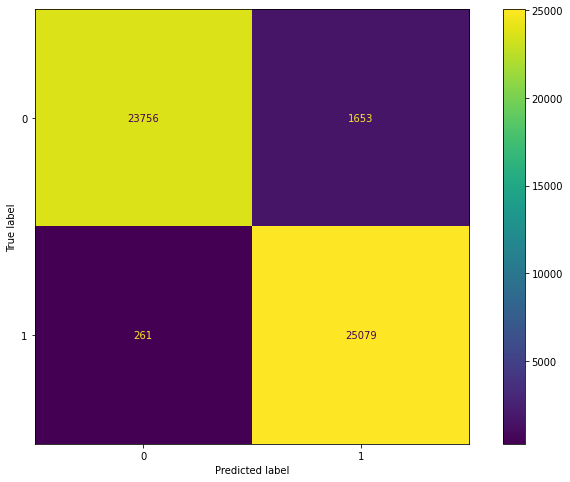

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

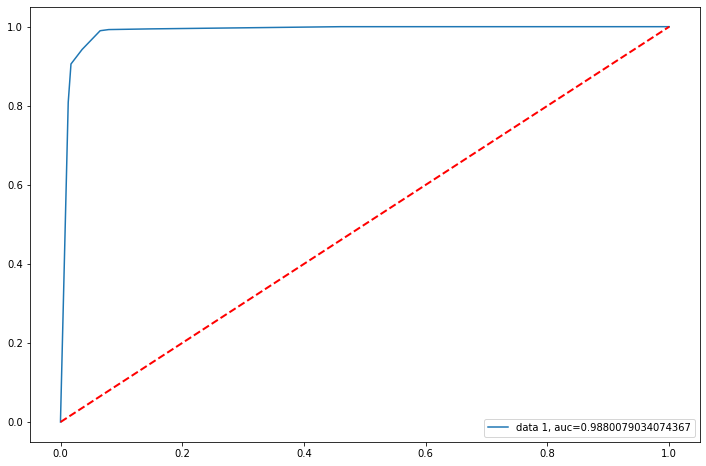

In [ ]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)
plt.show()

### Random forest

O algoritmo Random Forest se baseia na utilização de diversas árvores de decisão para encontrar o resultado. Como essa árvore pode ser usada para regressão e classificação, o Random Forest também pode ser utilizado para os dois tipos de problemas.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(max_depth=5, random_state=SEED)

In [ ]:
model = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print("Acurácia: ", metrics.accuracy_score(y_test, y_pred))
print("Precisão: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1: ", metrics.f1_score(y_test, y_pred))

Acurácia:  0.9723738398786183
Precisão:  0.9705165500432424
Recall:  0.9742699289660616
F1:  0.9723896175509079


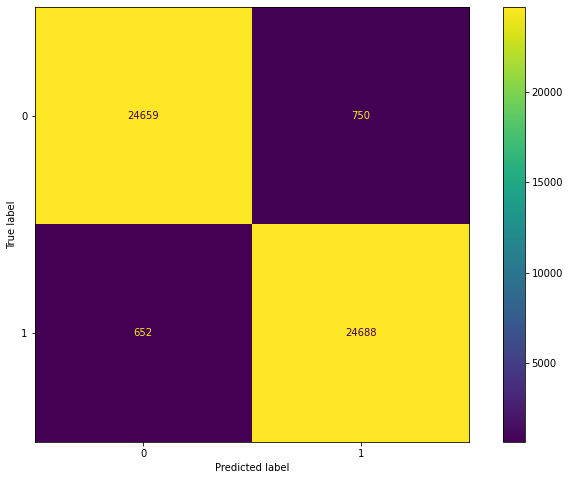

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

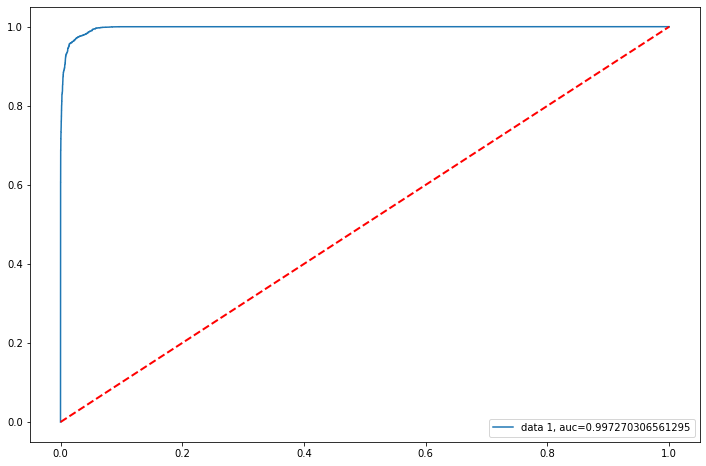

In [ ]:
y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)
plt.show()

### Análise de métricas

In [ ]:
classifiers = [
          LogisticRegression(max_iter=1000, random_state=SEED),
          DecisionTreeClassifier(max_depth=5, random_state=SEED),
          RandomForestClassifier(max_depth=5, random_state=SEED)]

*Para melhor apresentar a um possível cliente...*

LogisticRegression
****Resultados****
Acurácia:  0.9417722516699837
Precisão:  0.9241993556945234
Recall:  0.9623125493291239
F1:  0.9428709521507975


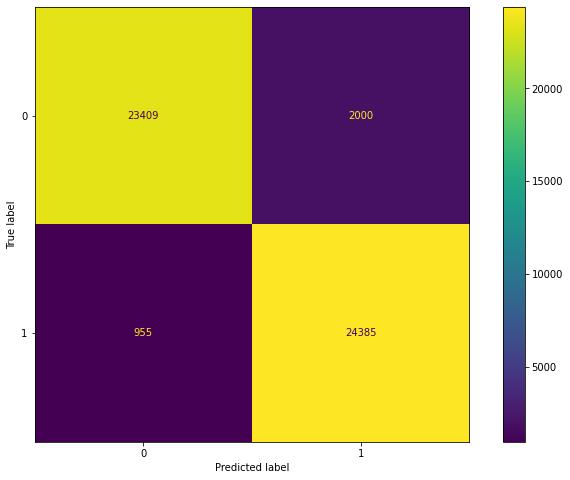

DecisionTreeClassifier
****Resultados****
Acurácia:  0.9622849711324362
Precisão:  0.9381639982043992
Recall:  0.9897000789265983
F1:  0.9632432017206943


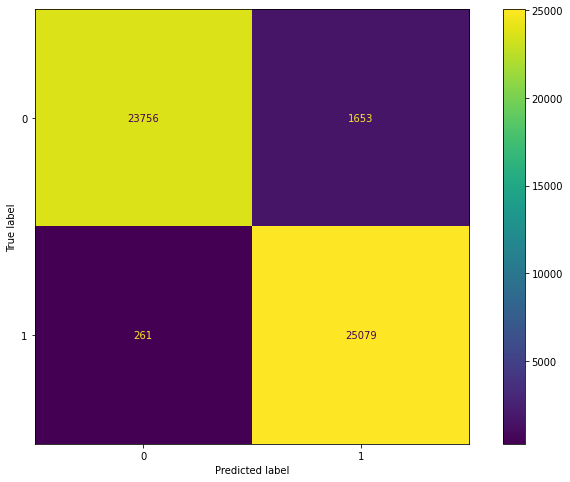

RandomForestClassifier
****Resultados****
Acurácia:  0.9723738398786183
Precisão:  0.9705165500432424
Recall:  0.9742699289660616
F1:  0.9723896175509079


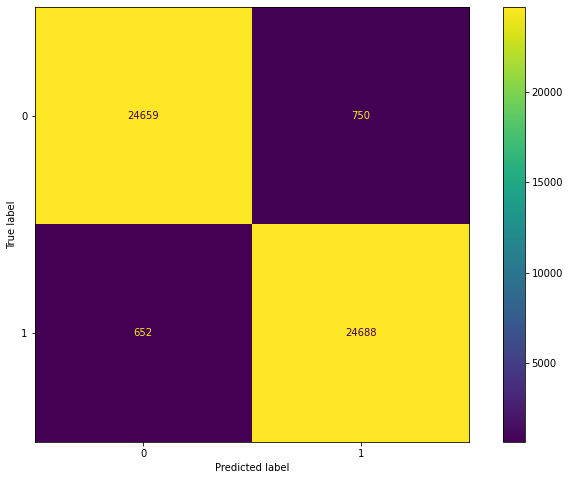

In [ ]:
for clf in classifiers:
  clf.fit(x_train, y_train)
  name = clf.__class__.__name__
  print("="*30)
  print(name)
  print("****Resultados****")
  y_pred = clf.predict(x_test)
  print("Acurácia: ", metrics.accuracy_score(y_test, y_pred))
  print("Precisão: ", metrics.precision_score(y_test, y_pred))
  print("Recall: ", metrics.recall_score(y_test, y_pred))
  print("F1: ", metrics.f1_score(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

## Melhorando o modelo

### RandomizedSearchCV

In [ ]:
n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

In [ ]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split" : min_samples_split,
    "min_samples_leaf" : min_samples_leaf,
    "bootstrap": bootstrap
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

SEED = 70

rforest = RandomForestClassifier(random_state = SEED)

In [ ]:
random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter=5, cv=3, scoring="recall", n_jobs=-1, random_state=SEED
)

# scoring="recall" - porque precisamos melhorar o recall

In [ ]:
%%time

rcv = random_cv.fit(x,y)

CPU times: user 29.8 s, sys: 267 ms, total: 30.1 s
Wall time: 3min 19s


In [ ]:
pd.DataFrame(rcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,35.325233,2.032850,0.881761,0.049518,120,4,2,auto,9,gini,False,"{'n_estimators': 120, 'min_samples_split': 4, ...",0.991665,0.999438,0.992817,0.994640,0.003425,2
1,12.804183,0.217988,0.637282,0.010625,120,4,2,auto,2,gini,False,"{'n_estimators': 120, 'min_samples_split': 4, ...",0.914223,0.936009,0.862704,0.904312,0.030736,5
2,15.065699,0.484950,0.298360,0.005957,40,8,1,sqrt,7,entropy,False,"{'n_estimators': 40, 'min_samples_split': 8, '...",0.980285,1.000000,0.973812,0.984699,0.011138,3
3,29.033244,3.034804,0.738847,0.037599,100,8,4,log2,9,entropy,True,"{'n_estimators': 100, 'min_samples_split': 8, ...",0.993497,0.999025,0.992226,0.994916,0.002951,1
4,16.981353,0.158988,0.773128,0.085777,160,6,2,log2,2,gini,False,"{'n_estimators': 160, 'min_samples_split': 6, ...",0.914223,0.943487,0.876537,0.911416,0.027404,4


In [ ]:
rcv.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 100}

### Resultados Finais

Com o RandomizedSearchCV foi possível fazer uma melhor análise na escolha dos atributos ideais para uma melhor perfomance do algoritmo. E agora com a escolha dos melhores parâmetros, analisamos como segue abaixo.



In [ ]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state = SEED)

model = rfn.fit(x_train, y_train)
y_pred = rfn.predict(x_test)

In [ ]:
print("Acurácia: ", metrics.accuracy_score(y_test, y_pred))
print("Precisão: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1: ", metrics.f1_score(y_test, y_pred))

Acurácia:  0.9915860411042582
Precisão:  0.9906258615936036
Recall:  0.9925414364640884
F1:  0.9915827238857459


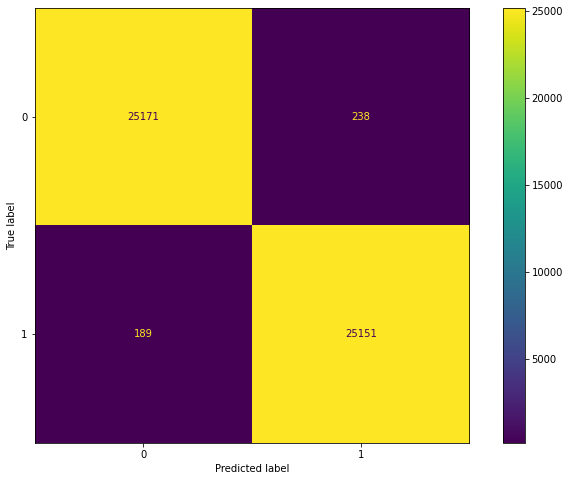

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

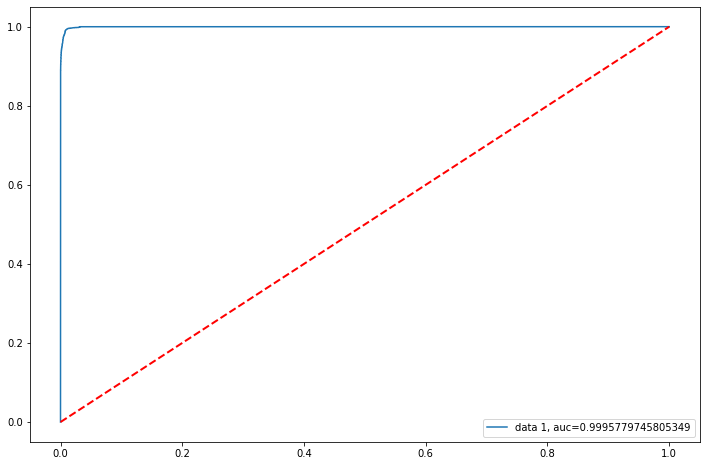

In [ ]:
y_pred_proba = rfn.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)
plt.show()